In [1]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
import seaborn as sns
import sklearn

# Предисловие

Данный датасет был выбран по тем причинам, что:\
а) отвечает условиям к датасету, представленными в задаче\
б) показался интересным для работы и *может* иметь хоть какую-то практическую ценность

# Датасет

In [2]:
# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")
path = path + "/Churn_Modelling.csv" 

print("Path to dataset files:", path)

Path to dataset files: C:\Users\troll\.cache\kagglehub\datasets\shrutimechlearn\churn-modelling\versions\1/Churn_Modelling.csv


In [3]:
df = pd.read_csv(path)

## Работа с данными

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Удалим колонки rowNumber & CustomerId & Surname
df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [6]:
# Преобразуем колонки География и Gender в категориональные признаки
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Geography'])
ohe = OneHotEncoder(sparse_output=False)
cat_enc_ohe = ohe.fit_transform(df[['Geography']])
temp = pd.DataFrame(cat_enc_ohe, columns=ohe.get_feature_names_out(['Geography']))
df = pd.concat([df.drop(columns=['Geography']), temp], axis=1)

In [7]:
# Преобразуем колонки География и Gender в категориональные признаки
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Gender'])
ohe = OneHotEncoder(sparse_output=False)
cat_enc_ohe = ohe.fit_transform(df[['Gender']])
temp = pd.DataFrame(cat_enc_ohe, columns=ohe.get_feature_names_out(['Gender']))
df = pd.concat([df.drop(columns=['Gender']), temp], axis=1)
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [8]:
# После преобразования данных проверим выборсы

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Исходя из данных можно сделать превадрительный вывод, что отравленных данных нет

In [11]:
# Для каждого не категорионального признака рассмотрим их распределение

In [12]:
non_cat_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

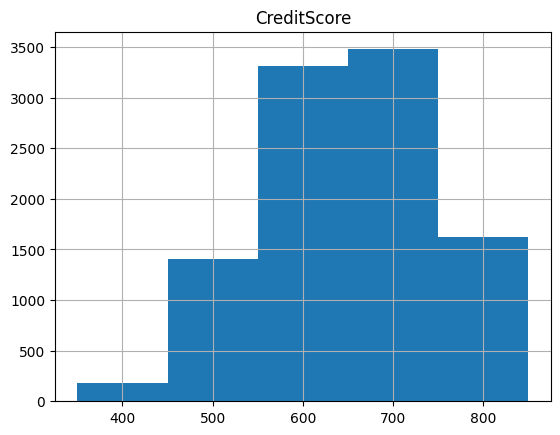

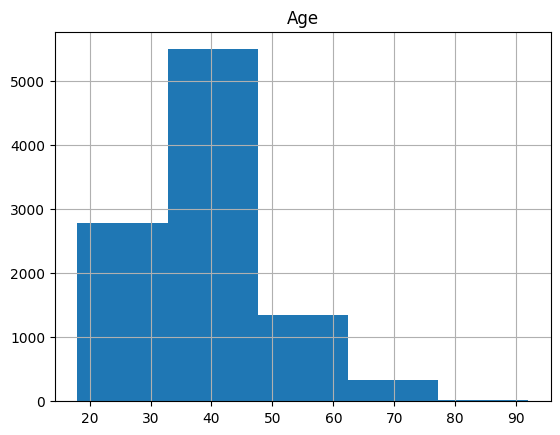

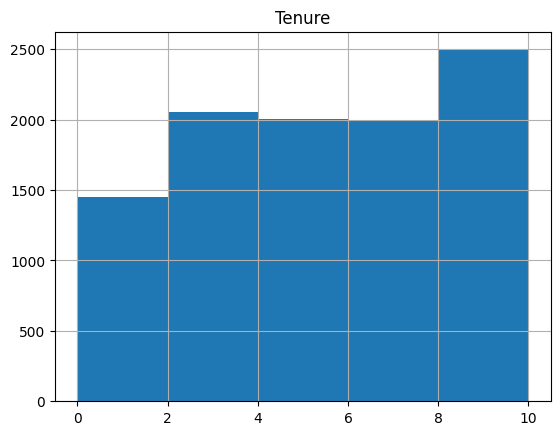

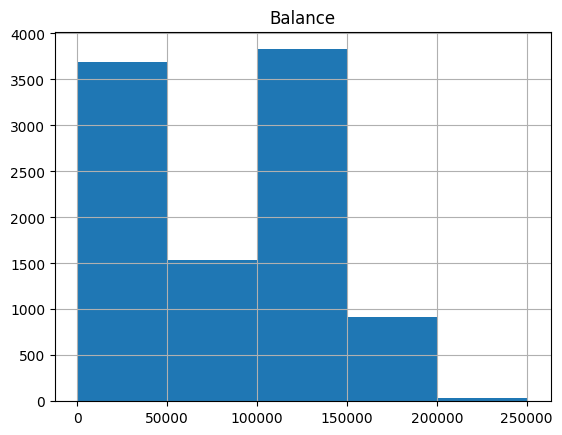

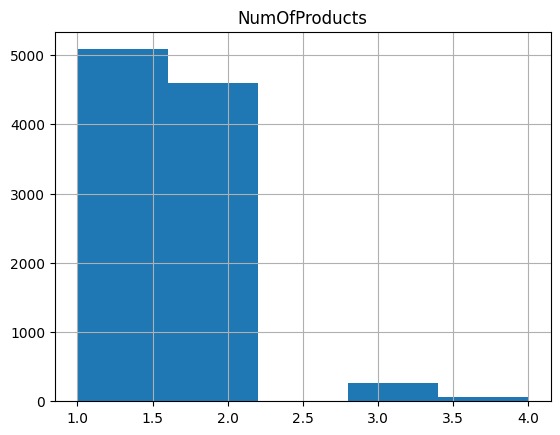

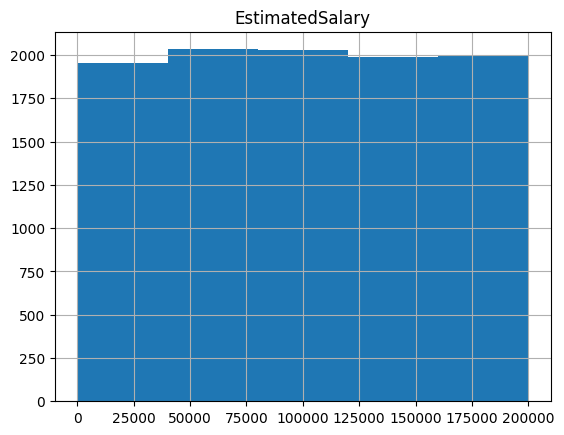

In [13]:
for non_cat_column in non_cat_columns:
    df.hist(non_cat_column, bins =5)

In [14]:
# исходя из распределения данных нельзя точно сказать, что есть какие-либо выбросы, так как в нашем датасете не имелось пропусков, то работу с ними опустим, но в обьщем случае для количественных признаков - медианное значение, а для категориональных - либо медианное, либо везде проставлять 0, зависит от целей и задач

In [15]:
# приведем количественные признаки

In [16]:
for non_cat_column in non_cat_columns:
    standart_scaler = sklearn.preprocessing.StandardScaler()
    standart_scaler.fit(df[non_cat_column].values.reshape(-1, 1))
    df[non_cat_column] = standart_scaler.transform(df[non_cat_column].values.reshape(-1, 1))

In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,0.70550,0.515100,-2.877698e-17,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.45584,0.499797,1.000050e+00,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-1.740268e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-8.535935e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.00000,1.000000,1.802807e-03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,1.00000,1.000000,8.572431e-01,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.00000,1.000000,1.737200e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# разобьем дф на тест, трейн, валдиацю
train_percent = 0.8
test_percent = 0.2

In [19]:
df_shuffled = df.sample(frac=1, random_state=42)

# Reset the index after shuffling (optional, but often desired)
df = df_shuffled.reset_index(drop=True)

In [20]:
y = df["Exited"]
X = df
X.drop(columns=["Exited"], inplace=True, axis=1)

In [21]:
# Разобьем на трейн и тест
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_percent, random_state=42)

In [22]:
# Сбалансируем классы

In [23]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")

Количество строк в y_train по классам: [6368 1632]


In [24]:
1644/6356

0.25865324103209564

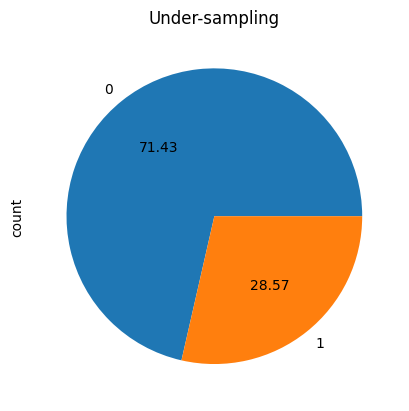

In [25]:
# Удаляем мажоритарные экзмепляры
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4)
X_train, y_train = rus.fit_resample(X_train, y_train)
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [26]:
print(f"Количество строк в y_train о классам: {np.bincount(y_train)}")

Количество строк в y_train о классам: [4080 1632]


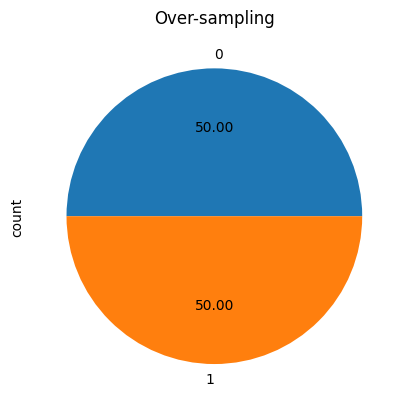

In [27]:
# Добавляем дубликаты миноритарного
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [28]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [4080 4080]
Количество строк в y_test по классам: [1595  405]


# Решение задачи о классификации

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

models = [KNeighborsClassifier(), MLPClassifier(), DecisionTreeClassifier(), GaussianNB(), PassiveAggressiveClassifier(), RidgeClassifier(), RandomForestClassifier(), BaggingClassifier()]

In [30]:
def get_model_stats(model, X_train_data, y_train_data, X_test_data, y_test_data, fit=True):
    if fit:
        model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_data, y_pred)
    prec = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    roc_auc = roc_auc_score(y_test_data, y_pred)
    return {
        "accuracy_score": acc, "precision_score": prec, "recall_score": recall, "f1_score": f1, "roc_auc_score": roc_auc, "model": model.__class__.__name__
    }

In [31]:
base_scores = []
for model in models:
    base_scores.append(get_model_stats(model, X_train, y_train, X_test, y_test))

E:\data\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
pd.DataFrame(base_scores)

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,model
0,0.7505,0.428788,0.698765,0.531455,0.731201,KNeighborsClassifier
1,0.8005,0.505576,0.671605,0.576882,0.752417,MLPClassifier
2,0.7805,0.463519,0.533333,0.495982,0.688297,DecisionTreeClassifier
3,0.7200,0.387518,0.659259,0.488117,0.697341,GaussianNB
4,0.6800,0.310789,0.476543,0.376218,0.604102,PassiveAggressiveClassifier
5,0.7090,0.376912,0.669136,0.482206,0.694129,RidgeClassifier
6,0.8390,0.607792,0.577778,0.592405,0.741553,RandomForestClassifier
7,0.8260,0.571429,0.562963,0.567164,0.727876,BaggingClassifier


In [33]:
# Подберем параметры для MLPClassifier DecisionTreeClassifier RandomForestClassifier BaggingClassifier

In [34]:
n_iter = 300
cv = 5
best = []
scoring= "roc_auc"

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

mlp = MLPClassifier(max_iter=1000)
param_distributions = {
    'hidden_layer_sizes': randint(50, 200),
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(loc=0.0001, scale=0.1),
    'learning_rate_init': uniform(loc=0.001, scale=0.01)
}

random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    scoring=scoring
)

random_search.fit(X_train, y_train)
best.append(random_search)
print(f"Best score: {random_search.best_score_}")
print(f"Best parameters: {random_search.best_params_}")

Best score: 0.9158986327374088
Best parameters: {'activation': 'relu', 'alpha': 0.0016966252220214195, 'hidden_layer_sizes': 179, 'learning_rate_init': 0.007842330265121569, 'solver': 'adam'}


In [36]:
dt_classifier = DecisionTreeClassifier(random_state=42)
param_distributions = {
    'max_depth': randint(low=2, high=20),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=5),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}
random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=cv, 
    scoring=scoring,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best.append(random_search)
print(f"Best score: {random_search.best_score_}")
print(f"Best parameters: {random_search.best_params_}")

Best score: 0.9016514081122645
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'best'}


In [37]:
rf = RandomForestClassifier()
param_distributions={'max_depth':list(np.arange(10, 100, step=10)) + [None],
      'n_estimators':np.arange(10, 500, step=50),
      'max_features':randint(1,7),
      'criterion':['gini','entropy'],
      'min_samples_leaf':randint(1,4),
      'min_samples_split':np.arange(2, 10, step=2)
}
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_distributions,
    n_iter=n_iter,
    scoring=scoring,
    n_jobs=-1,
    cv=cv,
    random_state=42
)
random_search.fit(X_train, y_train)
best.append(random_search)
print(f"Best score: {random_search.best_score_}")
print(f"Best parameters: {random_search.best_params_}")

Best score: 0.9820417627835448
Best parameters: {'criterion': 'gini', 'max_depth': 50, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}


In [38]:
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=base_estimator)
param_distributions = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10, 20]
}
random_search = RandomizedSearchCV(
    estimator=bagging_clf,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=cv,
    scoring=scoring,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best.append(random_search)
print(f"Best score: {random_search.best_score_}")
print(f"Best parameters: {random_search.best_params_}")

Best score: 0.9859918661091889
Best parameters: {'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.7, 'estimator__max_depth': 20, 'bootstrap_features': True, 'bootstrap': False}


# Выводы

In [39]:
# Ну вроде лучший из проверенных мною - {вставить лучший}
# всякие матрицы и пр метрики будут позже, они для презты только нужны по идее

In [44]:
for each in best:
    model = each.best_estimator_
    print(f"{model.__class__.__name__} - {get_model_stats(model, X_train, y_train, X_test, y_test, fit=False)["roc_auc_score"]}")

MLPClassifier - 0.7167692248152018
DecisionTreeClassifier - 0.6871821664925113
RandomForestClassifier - 0.7378884631758196
BaggingClassifier - 0.6884631758194976


In [47]:
model = best[2]
print(model.__class__.__name__)
get_model_stats(model, X_train, y_train, X_test, y_test, fit=False)

RandomizedSearchCV


{'accuracy_score': 0.8405,
 'precision_score': 0.6155913978494624,
 'recall_score': 0.5654320987654321,
 'f1_score': 0.5894465894465895,
 'roc_auc_score': 0.7378884631758196,
 'model': 'RandomizedSearchCV'}

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
y_pred = model.predict(X_test)

[[1452  143]
 [ 176  229]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1595
           1       0.62      0.57      0.59       405

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



<Axes: >

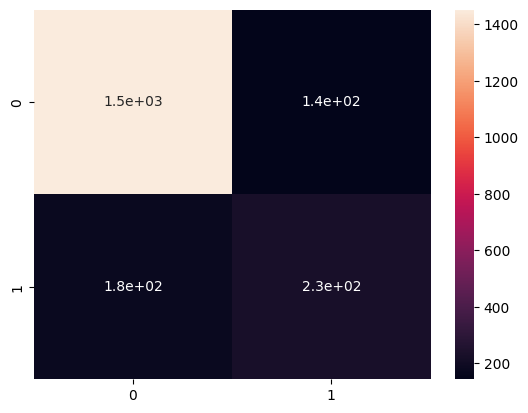

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)